In [6]:
import wget
wget.download('https://github.com/jieunchoi/MIST_codes/raw/master/scripts/' +
         'read_mist_models.py')

'read_mist_models.py'

In [5]:
pip install wget

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9680 sha256=1df9d32ae322774e5bc5ef634f894f47de5feebaaa9f71414018068f22802f87
  Stored in directory: /Users/chris.w/Library/Caches/pip/wheels/bd/a8/c3/3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0
Successfully built wget
Note: you may need to restart the kernel to use updated packages.


In [10]:
%matplotlib inline
import read_mist_models
import numpy as np
import matplotlib.pyplot as plt

In [44]:
iso = read_mist_models.ISOCMD('MIST_iso_62683c2b19a86.iso.cmd')

Reading in: MIST_iso_62683c2b19a86.iso.cmd


In [45]:
iso_array = iso.isocmds[0]

In [53]:
iso_array.dtype

dtype([('EEP', '<i4'), ('log10_isochrone_age_yr', '<f8'), ('initial_mass', '<f8'), ('star_mass', '<f8'), ('log_Teff', '<f8'), ('log_g', '<f8'), ('log_L', '<f8'), ('[Fe/H]_init', '<f8'), ('[Fe/H]', '<f8'), ('Bessell_U', '<f8'), ('Bessell_B', '<f8'), ('Bessell_V', '<f8'), ('Bessell_R', '<f8'), ('Bessell_I', '<f8'), ('2MASS_J', '<f8'), ('2MASS_H', '<f8'), ('2MASS_Ks', '<f8'), ('Kepler_Kp', '<f8'), ('Kepler_D51', '<f8'), ('Hipparcos_Hp', '<f8'), ('Tycho_B', '<f8'), ('Tycho_V', '<f8'), ('Gaia_G_DR2Rev', '<f8'), ('Gaia_BP_DR2Rev', '<f8'), ('Gaia_RP_DR2Rev', '<f8'), ('Gaia_G_MAW', '<f8'), ('Gaia_BP_MAWb', '<f8'), ('Gaia_BP_MAWf', '<f8'), ('Gaia_RP_MAW', '<f8'), ('TESS', '<f8'), ('Gaia_G_EDR3', '<f8'), ('Gaia_BP_EDR3', '<f8'), ('Gaia_RP_EDR3', '<f8'), ('phase', '<f8')])

In [47]:
phase_mask = (iso_array['phase'] < 0)

In [48]:
phase_mask.sum()

70

In [49]:
prems = iso_array[phase_mask]
len(prems)

70

In [50]:
import astropy.coordinates as coord
import astropy.units as u
distance = 155 * u.pc
distmod = coord.Distance(distance).distmod.value
distmod


5.951658490851457

In [57]:
mag_g = prems['Gaia_G_DR2Rev'] + distmod
color = prems['Gaia_BP_DR2Rev'] - prems['Gaia_RP_DR2Rev']

In [60]:
mag_g

array([17.91471549, 17.86719849, 17.80695149, 17.74655049, 17.68587149,
       17.62484049, 17.56341449, 17.50129749, 17.43854849, 17.37506249,
       17.30841549, 17.22980249, 17.15069049, 17.05332349, 16.95322849,
       16.85281549, 16.75686449, 16.66139249, 16.57147449, 16.48509749,
       16.39900949, 16.31420249, 16.23104549, 16.14855849, 16.06875249,
       15.98873149, 15.91464049, 15.85054149, 15.80495049, 15.77205649,
       15.76513549, 15.75811149, 15.75107749, 15.74401449, 15.73703149,
       15.73021749, 15.72361649, 15.71334749, 15.69740149, 15.66922949,
       15.60979049, 15.53390549, 15.40832249, 15.26323549, 15.12682949,
       14.94460849, 14.77722349, 14.58971649, 14.39188649, 14.21928049,
       13.97191449, 13.81403749, 13.64600249, 13.46182849, 13.27141049,
       13.08224849, 12.88419849, 12.69427049, 12.51223849, 12.33640749,
       12.16549849, 11.99793049, 11.83454849, 11.70034249, 11.63201149,
       11.60445449, 11.58256149, 11.54359549, 11.47278549, 11.36

In [66]:
color

array([3.220234, 3.203553, 3.182694, 3.162027, 3.141467, 3.120954,
       3.10044 , 3.079776, 3.058945, 3.037915, 3.015298, 2.986156,
       2.957119, 2.918737, 2.879931, 2.841887, 2.80402 , 2.767456,
       2.731462, 2.696179, 2.661598, 2.628725, 2.597809, 2.567912,
       2.540201, 2.512479, 2.487058, 2.46518 , 2.449851, 2.439298,
       2.437347, 2.435299, 2.433176, 2.430926, 2.428575, 2.426117,
       2.423558, 2.419391, 2.412868, 2.402345, 2.38122 , 2.354964,
       2.313052, 2.265609, 2.221689, 2.163913, 2.111335, 2.053873,
       1.994109, 1.942379, 1.870021, 1.819169, 1.763363, 1.697859,
       1.628601, 1.560463, 1.487835, 1.42025 , 1.357659, 1.298793,
       1.24355 , 1.188506, 1.134516, 1.089465, 1.060834, 1.045992,
       1.034563, 1.021087, 1.004518, 0.981505])

(19.0, 11.0)

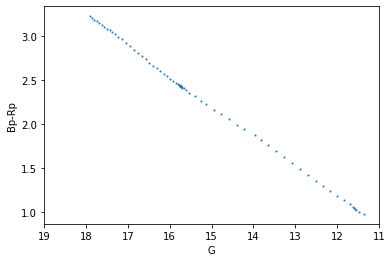

In [65]:
plt.scatter(mag_g, color, s=1)
plt.xlabel('G')
plt.ylabel('Bp-Rp')
plt.xlim(19,11)